In [1]:
cd ..

/home/abhishekabhishek/git/UnsupGenModbyMPS


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pennylane as qml
from pennylane import numpy as pnp

from MPScumulant import MPS_c
import mps_circuit_helpers as helpers
import mps_circuit
import metrics

%load_ext autoreload

In [3]:
# Load the trained MPS
%autoreload
m = MPS_c(16, max_bond_dim=2)
m.loadMPS('BS-2-MPS')

# check the properties of the matrices in the MPS
for i in range(len(m.matrices)):
    tn_core = m.matrices[i]
    print(i, tn_core.shape)

0 (1, 2, 2)
1 (2, 2, 2)
2 (2, 2, 2)
3 (2, 2, 2)
4 (2, 2, 2)
5 (2, 2, 2)
6 (2, 2, 2)
7 (2, 2, 2)
8 (2, 2, 2)
9 (2, 2, 2)
10 (2, 2, 2)
11 (2, 2, 2)
12 (2, 2, 2)
13 (2, 2, 2)
14 (2, 2, 2)
15 (2, 2, 1)


In [4]:
m_pad = helpers.pad_mps(m)

idx, shape of the padded tensor, updated bond dimension
i = 1, (2, 2, 2), 2
i = 2, (2, 2, 2), 2
i = 3, (2, 2, 2), 2
i = 4, (2, 2, 2), 2
i = 5, (2, 2, 2), 2
i = 6, (2, 2, 2), 2
i = 7, (2, 2, 2), 2
i = 8, (2, 2, 2), 2
i = 9, (2, 2, 2), 2
i = 10, (2, 2, 2), 2
i = 11, (2, 2, 2), 2
i = 12, (2, 2, 2), 2
i = 13, (2, 2, 2), 2
i = 14, (2, 2, 2), 2


In [5]:
# check the properties of the matrices in the paddded MPS
for i in range(len(m_pad.matrices)):
    tn_core = m_pad.matrices[i]
    print(i, tn_core.shape)

0 (1, 2, 2)
1 (2, 2, 2)
2 (2, 2, 2)
3 (2, 2, 2)
4 (2, 2, 2)
5 (2, 2, 2)
6 (2, 2, 2)
7 (2, 2, 2)
8 (2, 2, 2)
9 (2, 2, 2)
10 (2, 2, 2)
11 (2, 2, 2)
12 (2, 2, 2)
13 (2, 2, 2)
14 (2, 2, 2)
15 (2, 2, 1)


In [6]:
# check for isometries by reshaping along axis 0
helpers.are_isometries(m_pad)

idx, core tensor shape, left isometry, right isometry
0 (1, 2, 2) True True
1 (2, 2, 2) True False
2 (2, 2, 2) True False
3 (2, 2, 2) True False
4 (2, 2, 2) True False
5 (2, 2, 2) True False
6 (2, 2, 2) True False
7 (2, 2, 2) True False
8 (2, 2, 2) True False
9 (2, 2, 2) True False
10 (2, 2, 2) True False
11 (2, 2, 2) True False
12 (2, 2, 2) True False
13 (2, 2, 2) True False
14 (2, 2, 2) False False
15 (2, 2, 1) False False


In [7]:
# check for isometries by reshaping along axis 0
helpers.are_isometries(m_pad, reshape_axis=2)

idx, core tensor shape, left isometry, right isometry
0 (1, 2, 2) False False
1 (2, 2, 2) False False
2 (2, 2, 2) False False
3 (2, 2, 2) False False
4 (2, 2, 2) False False
5 (2, 2, 2) False False
6 (2, 2, 2) False False
7 (2, 2, 2) False False
8 (2, 2, 2) False False
9 (2, 2, 2) False False
10 (2, 2, 2) False False
11 (2, 2, 2) False False
12 (2, 2, 2) False False
13 (2, 2, 2) False False
14 (2, 2, 2) False False
15 (2, 2, 1) True True


In [8]:
# left canonicalize the padded MPS
m_pad.left_cano()

bond: 0
bond: 1
bond: 2
bond: 3
bond: 4
bond: 5
bond: 6
bond: 7
bond: 8
bond: 9
bond: 10
bond: 11
bond: 12
bond: 13
bond: 14


In [9]:
# check for isometries by reshaping along axis 0
helpers.are_isometries(m_pad)

idx, core tensor shape, left isometry, right isometry
0 (1, 2, 2) True True
1 (2, 2, 2) True False
2 (2, 2, 2) True False
3 (2, 2, 2) True False
4 (2, 2, 2) True False
5 (2, 2, 2) True False
6 (2, 2, 2) True False
7 (2, 2, 2) True False
8 (2, 2, 2) True False
9 (2, 2, 2) True False
10 (2, 2, 2) True False
11 (2, 2, 2) True False
12 (2, 2, 2) True False
13 (2, 2, 2) True False
14 (2, 2, 2) True False
15 (2, 2, 1) True False


In [10]:
# check for isometries by reshaping along axis 0
helpers.are_isometries(m_pad, reshape_axis=2)

idx, core tensor shape, left isometry, right isometry
0 (1, 2, 2) False False
1 (2, 2, 2) False False
2 (2, 2, 2) False False
3 (2, 2, 2) False False
4 (2, 2, 2) False False
5 (2, 2, 2) False False
6 (2, 2, 2) False False
7 (2, 2, 2) False False
8 (2, 2, 2) False False
9 (2, 2, 2) False False
10 (2, 2, 2) False False
11 (2, 2, 2) False False
12 (2, 2, 2) False False
13 (2, 2, 2) False False
14 (2, 2, 2) False False
15 (2, 2, 1) False False


In [14]:
unitary_list = []
tn_cores = m_pad.matrices
for site_idx in range(len(tn_cores)):
    tn_core = tn_cores[site_idx]
    # this step assumes that the core tensor is a left isometry
    u_mat = helpers.isometry_to_unitary(tn_core.reshape(-1, tn_core.shape[2]))
    unitary_list.append(u_mat)

In [15]:
# check if all matrices in the list are unitaries
for mat in unitary_list:
    print(helpers.is_unitary(mat))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


According to `Parallel quantum simulation of large systems on small
NISQ computers, arXiV:2003.12087`, we should throw away the last unitary for the last site since it is redundant and may be replaced with an identity.

In [16]:
len(unitary_list)

16

In [17]:
for idx, unitary in enumerate(unitary_list):
    print(idx, unitary.shape)

0 (2, 2)
1 (4, 4)
2 (4, 4)
3 (4, 4)
4 (4, 4)
5 (4, 4)
6 (4, 4)
7 (4, 4)
8 (4, 4)
9 (4, 4)
10 (4, 4)
11 (4, 4)
12 (4, 4)
13 (4, 4)
14 (4, 4)
15 (4, 4)


Time to build the correct circuit!

In [15]:
unitary_list = unitary_list[1:]
n_wires = len(unitary_list) + 1
dev = qml.device("default.qubit", wires=n_wires, shots=None)

In [17]:
@qml.qnode(dev)
def mps_circuit():
    # start from wire N (n-1), apply the N-1 (n) unitary to the last wire upto the no.
    # of wires allowed by the unitary size and repeat until wire 2 (1)
    for wire in range(n_wires-2, -1, -1):
        unitary = unitary_list[wire]
        n_qubits = int(np.log2(unitary.shape[0]))
        u_wires = [wire] + list(range(wire+1, wire+n_qubits, 1))
        qml.QubitUnitary(unitary, wires=u_wires)
        
    return qml.probs(wires=range(n_wires))

(<Figure size 1224x1296 with 1 Axes>, <Axes: >)

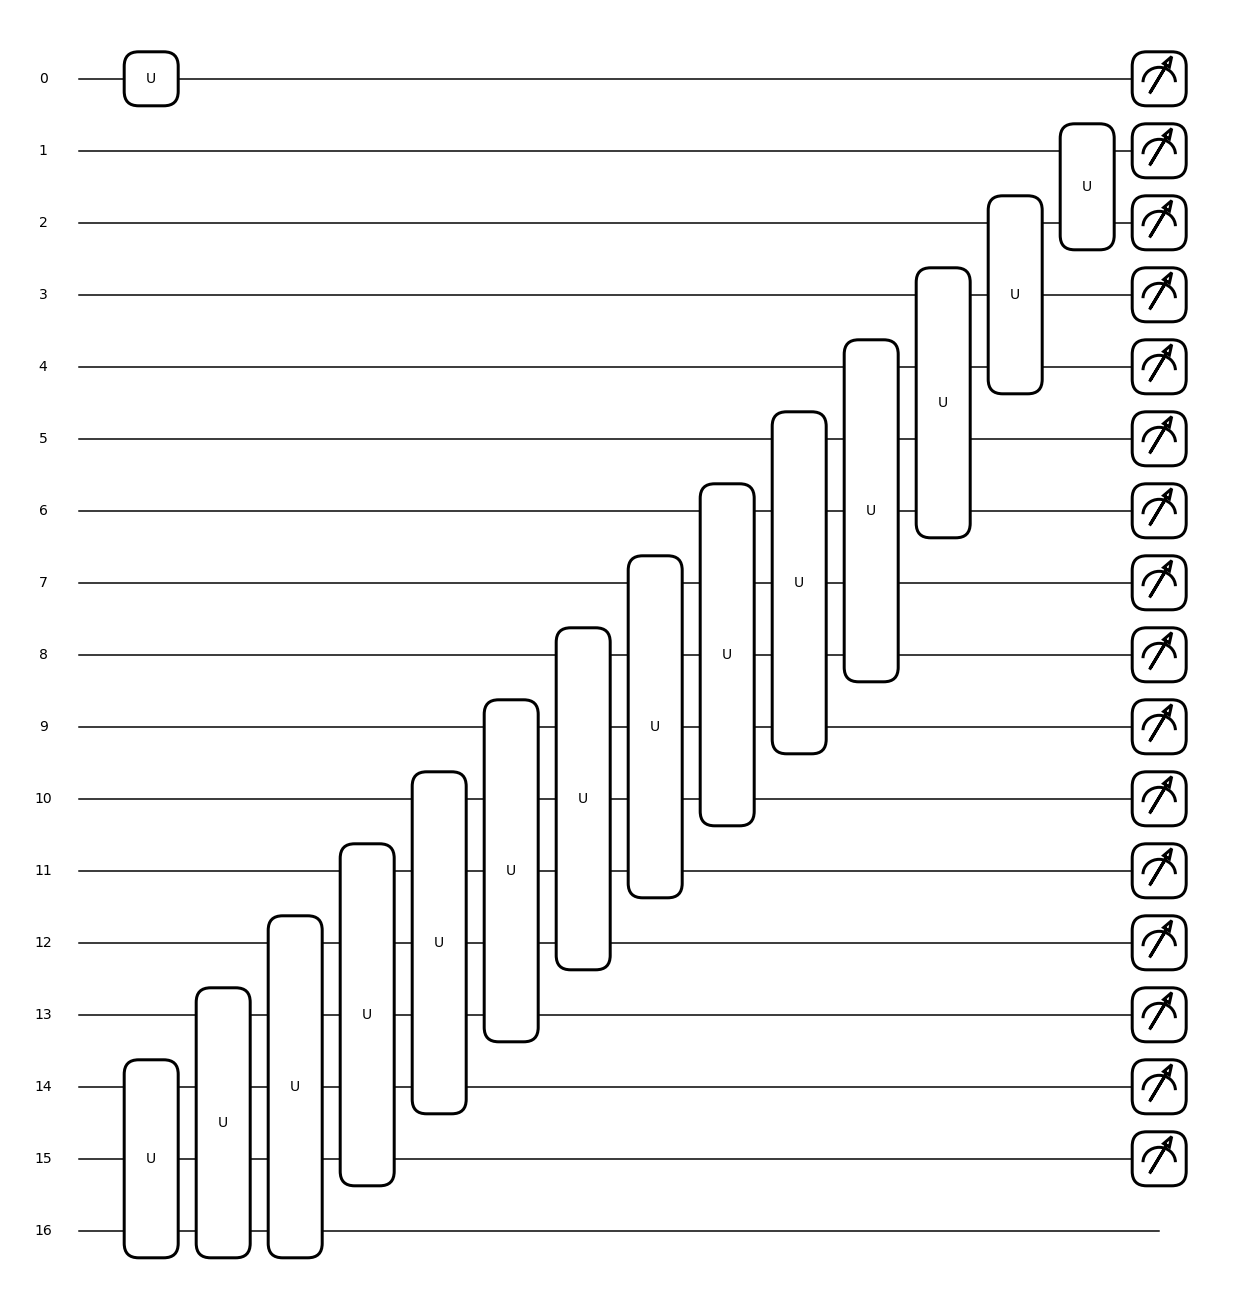

In [18]:
qml.drawer.draw_mpl(mps_circuit)()

In [16]:
mps_circ = mps_circuit.mps_unitaries_to_circuit(unitary_list)

In [19]:
qc_probs = mps_circ()
filter_qc_probs = metrics.filter_probs(qc_probs, data_states)
metrics.kl_divergence_synergy_paper(30, filter_qc_probs)

Array(10.769989, dtype=float32)

Check if this mapping works ?

In [18]:
data = np.load('BStest/BSdata.npy')
data_states = data.reshape(-1, 16).astype(np.int8)

In [20]:
qc_probs = mps_circuit()
filter_qc_probs = metrics.filter_probs(qc_probs, data_states)
metrics.kl_divergence_synergy_paper(30, filter_qc_probs)

WireError: Did not find some of the wires (14, 15, 16) on device with wires (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15).

In [ ]:
mps_probs_states = m.Give_probab(data_states)
metrics.kl_divergence_synergy_paper(30, mps_probs_states)

Array(1.4305115e-06, dtype=float32)

In [ ]:
mps_pad_probs_states = m_pad.Give_probab(data_states)
metrics.kl_divergence_synergy_paper(30, mps_pad_probs_states)

Array(1.4305115e-06, dtype=float32)

It's a good sign that the same KL-divergence is being assigned by the original and the padded MPS but the circuit is still far off!

Trying a different approach after referencing the decomposition paper!

In [19]:
# we recalculate the unitary list so that we're not throwing away the last
# element
len(unitary_list)

16

In [20]:
n_wires = len(unitary_list)
dev = qml.device("default.qubit", wires=n_wires, shots=None)

@qml.qnode(dev)
def mps_circuit():
    # start from wire N (n-1), apply the N-1 (n) unitary to the last wire upto the no.
    # of wires allowed by the unitary size and repeat until wire 2 (1)
    for wire in range(n_wires-1, -1, -1):
        unitary = unitary_list[wire]
        n_qubits = int(np.log2(unitary.shape[0]))
        u_wires = [wire] + list(range(wire-1, wire-n_qubits, -1))
        qml.QubitUnitary(unitary, wires=u_wires)
        
    return qml.probs(wires=range(n_wires))

In [22]:
for wire in range(n_wires-1, -1, -1):
    n_qubits = 2
    u_wires = [wire] + list(range(wire-1, wire-n_qubits, -1))
    print(wire, u_wires)

14 [14, 13]
13 [13, 12]
12 [12, 11]
11 [11, 10]
10 [10, 9]
9 [9, 8]
8 [8, 7]
7 [7, 6]
6 [6, 5]
5 [5, 4]
4 [4, 3]
3 [3, 2]
2 [2, 1]
1 [1, 0]
0 [0, -1]


In [21]:
qc_probs = mps_circuit()
filter_qc_probs = metrics.filter_probs(qc_probs, data_states)
metrics.kl_divergence_synergy_paper(30, filter_qc_probs)

Array(12.067436, dtype=float32)

(<Figure size 1368x1224 with 1 Axes>, <Axes: >)

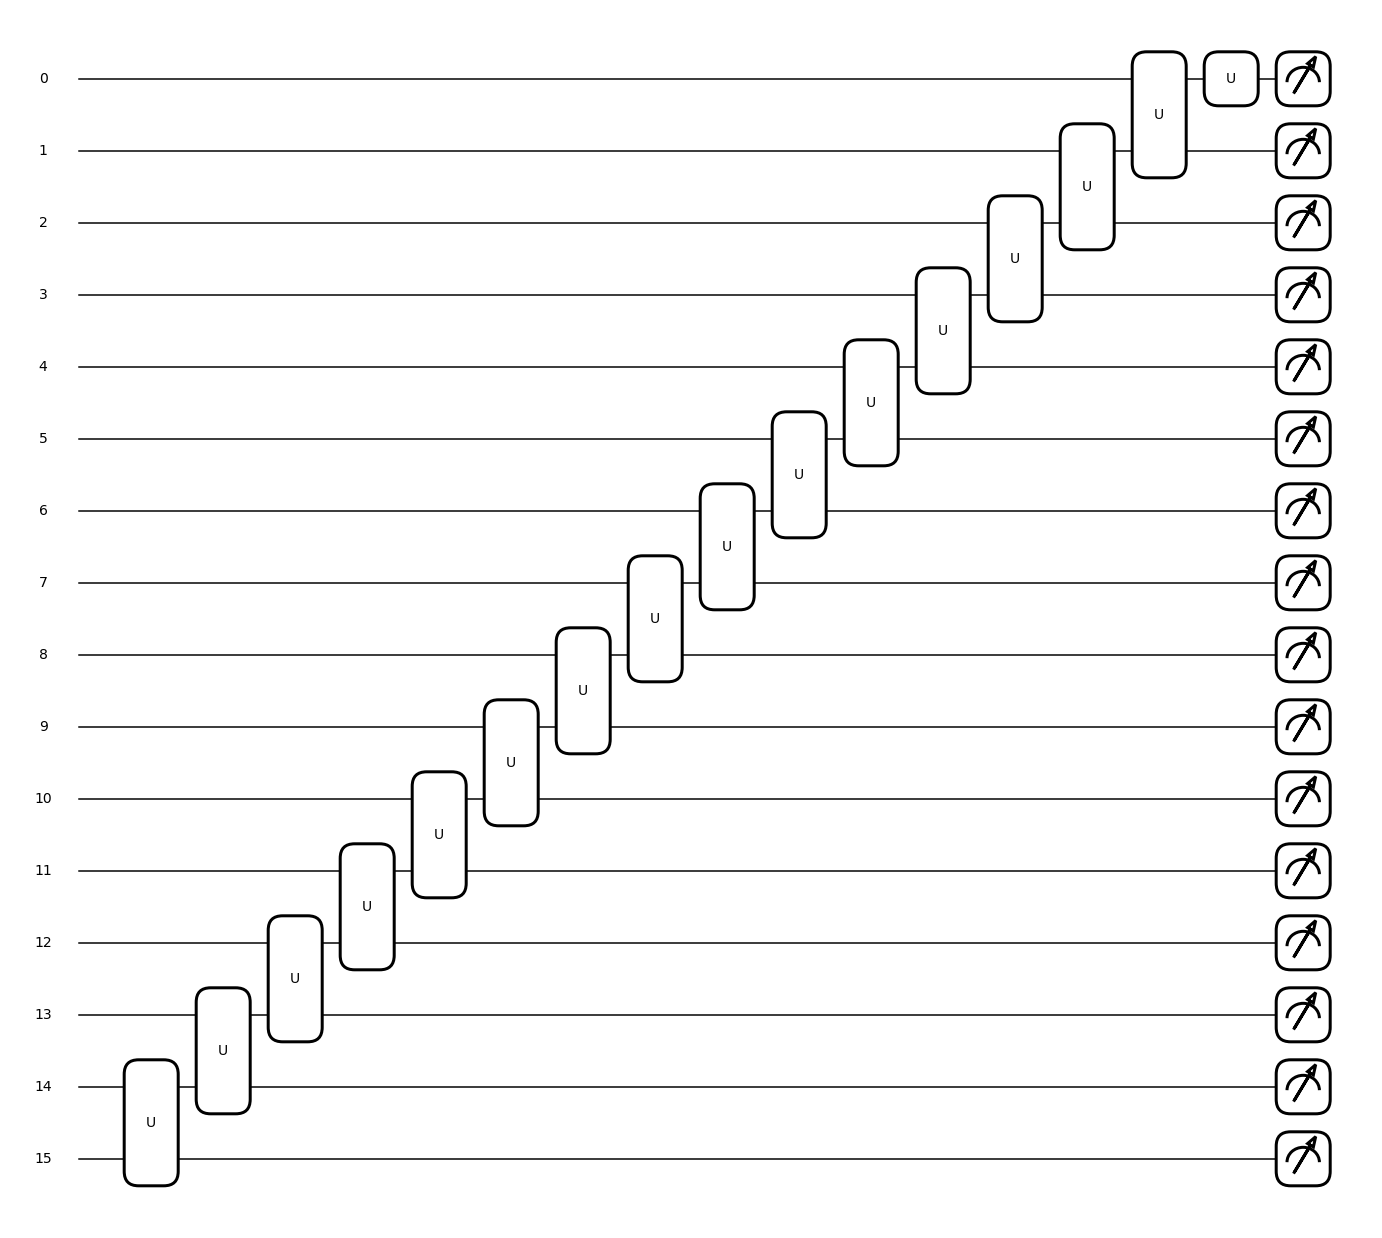

In [22]:
qml.drawer.draw_mpl(mps_circuit)()

What happens if we do not include the single-qubit unitary at site 0?

In [32]:
truncated_unitaries = unitary_list[1:]

@qml.qnode(dev)
def mps_circuit():
    # start from wire N (n-1), apply the N-1 (n) unitary to the last wire upto the no.
    # of wires allowed by the unitary size and repeat until wire 2 (1)
    for wire in range(n_wires-1, 0, -1):
        unitary = truncated_unitaries[wire-1]
        n_qubits = int(np.log2(unitary.shape[0]))
        u_wires = [wire] + list(range(wire-1, wire-n_qubits, -1))
        qml.QubitUnitary(unitary, wires=u_wires)
        
    return qml.probs(wires=range(n_wires))

In [33]:
qc_probs = mps_circuit()
filter_qc_probs = metrics.filter_probs(qc_probs, data_states)
metrics.kl_divergence_synergy_paper(30, filter_qc_probs)

Array(12.19232, dtype=float32)

(<Figure size 1800x1700 with 1 Axes>, <Axes: >)

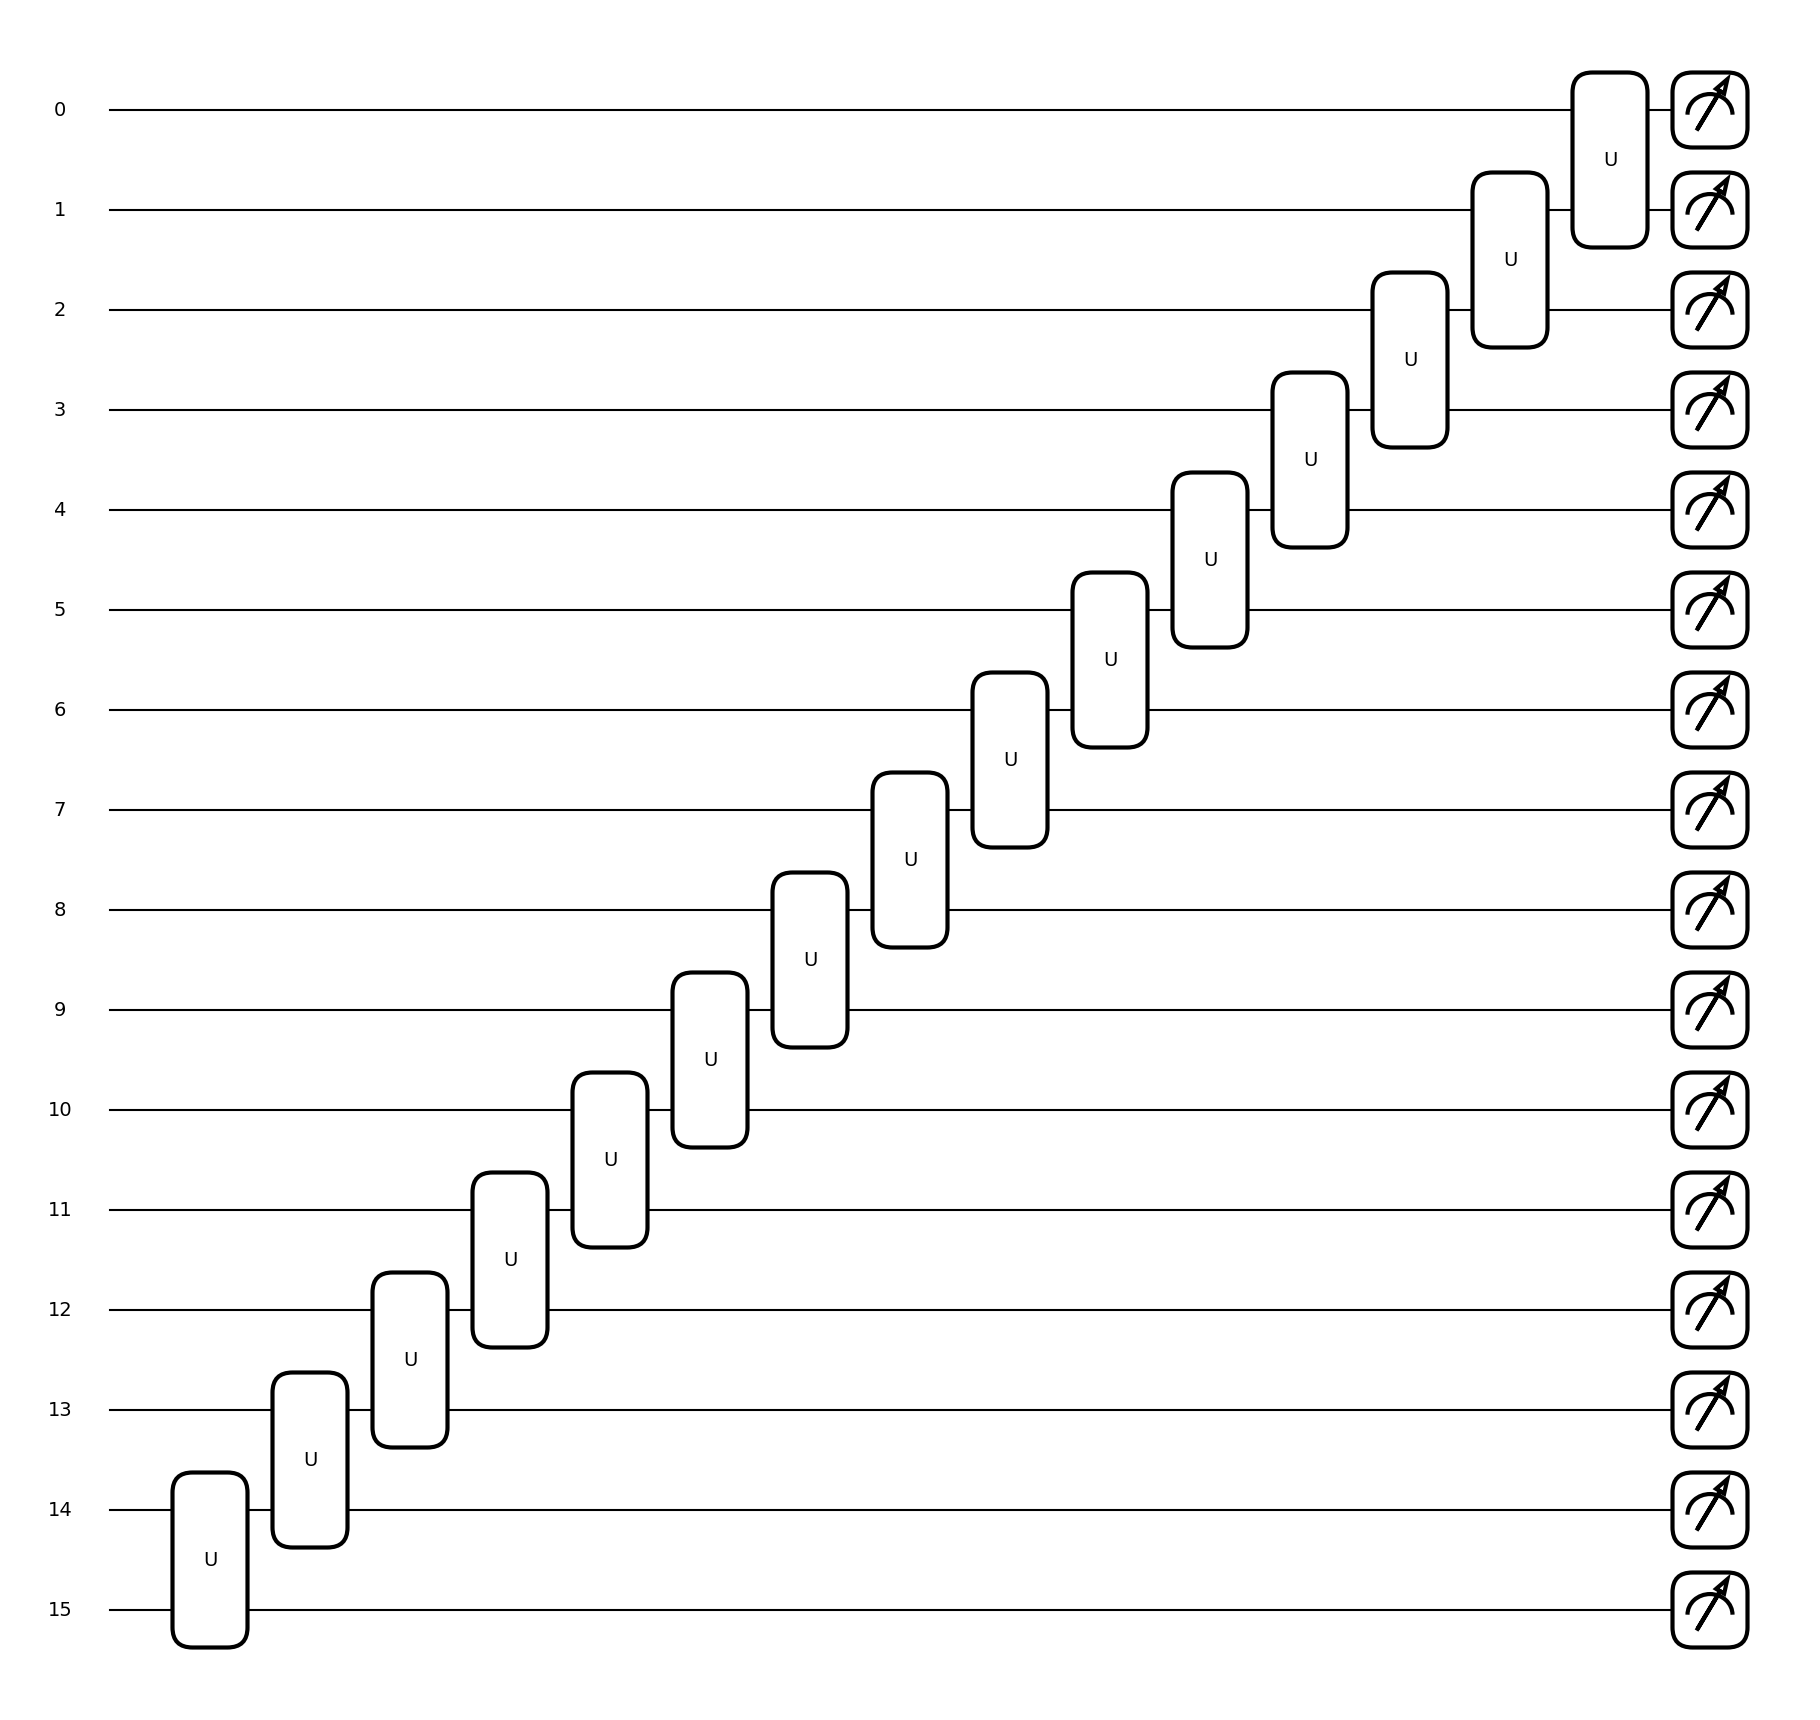

In [34]:
qml.drawer.draw_mpl(mps_circuit)()

Looks like discarding the single qubit unitary for the first site does not have much impact on the result

In [35]:
unitary_list[0]

array([[ 0.66131632, -0.75010714],
       [ 0.75010714,  0.66131632]])